# Lecture 4: plotting & data science

## Content

* primer on lecture 5
* summary of lecture 3
* plotting with `matplotlib`
* data science: `pandas`
    * the `DataFrame`
    * loading data
    * standard operations

## Primer on lecture 5

* Lecture 5 can contain sort of a *and-all-the-rest*-slot
* I'll spend most parts of it finishing this notebook
* this is the place where I could tell you all the things that you want to hear
* so **tell me what you are interested in!**


## Summary of lecture 3
 
* `numpy`: 
    * the `array`
    * indexing
    * some standard operations/methods
    * linear algebra `<3`

In [1]:
#

## Matplotlib

Matplotlib is a plotting library. In this section I give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [1]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [3]:
%matplotlib inline

In [4]:
import numpy as np

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

In [6]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

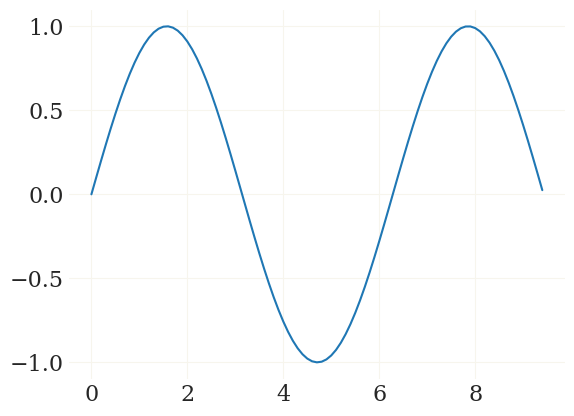

In [8]:
plt.plot(x,y)

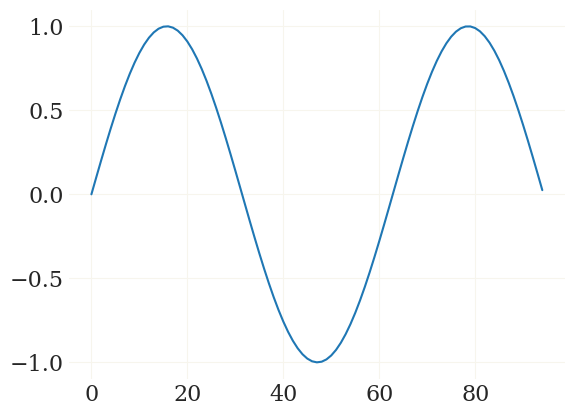

In [9]:
plt.plot(y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

In [10]:
y_sin = np.sin(x)
y_cos = np.cos(x)

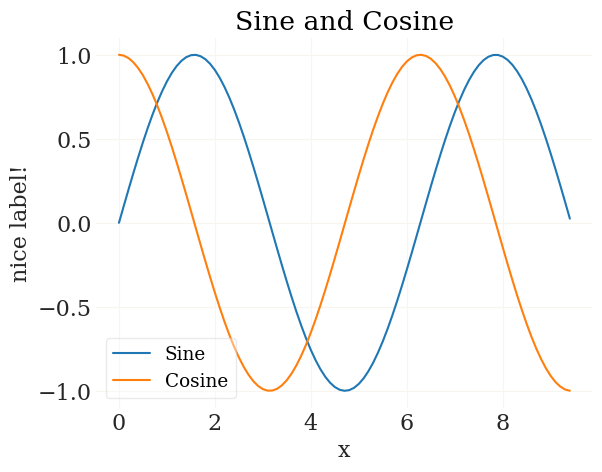

In [16]:
plt.plot(x,y_sin)
plt.plot(x,y_cos)
plt.xlabel('x')
plt.ylabel('nice label!')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

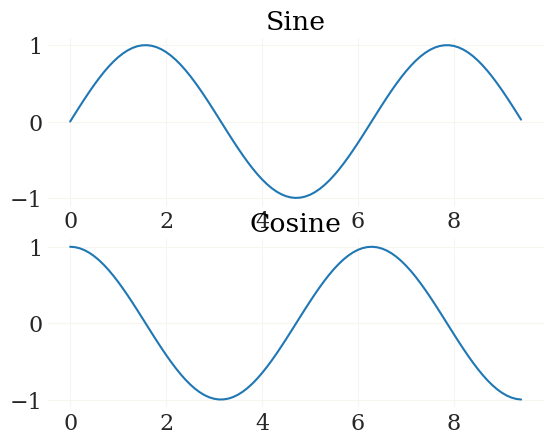

In [19]:
plt.subplot(2,1,1)

plt.plot(x, y_sin)
plt.title('Sine')

plt.subplot(2,1,2)
plt.plot(x, y_cos)
plt.title('Cosine')


Lets go for a slightly more complex plot

In [21]:
x = np.linspace(-2,2,100)
y = x**2
y2 = x**3

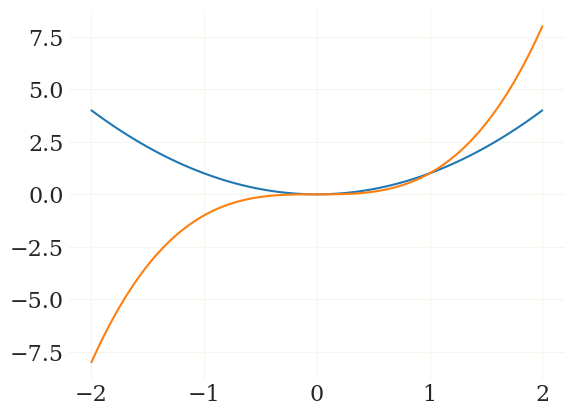

In [23]:
plt.plot(x,y)
plt.plot(x,y2)

#### Exercise: Plotting
Plot the function 
$$f(x) = x^4+2$$ 
on $x \in (-2,2)$.

In [24]:
def f(x):
    return x**4 + 2

In [27]:
x = np.linspace(-2,2,1000)

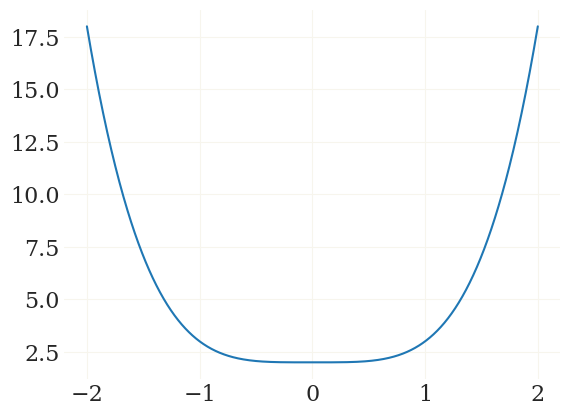

In [28]:
plt.plot(x,f(x))

## Introduction to Pandas

Credits: this chapter is heavily inspired by [this](https://github.com/jorisvandenbossche/pandas-tutorial) and [this other](https://github.com/jvns/pandas-cookbook) tutorial. Thanks!

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8 # just to make things even prettier

# 1. Let's start with a showcase

#### Case 1: titanic survival data

In [31]:
df = pd.read_csv("data/titanic.csv")

In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

<AxesSubplot:>

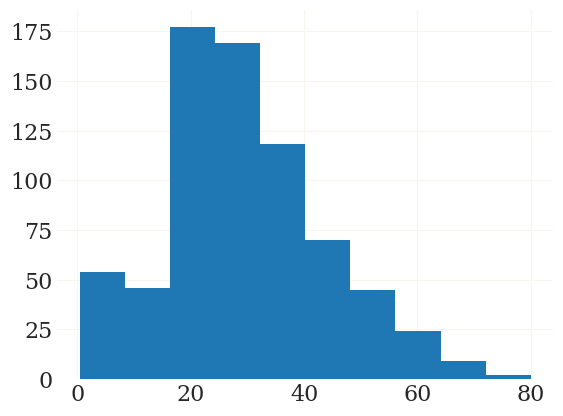

In [37]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

In [38]:
df.groupby('Sex')[['Survived']].sum()

,Survived
Sex,
female,233
male,109


**Or how does it differ between the different classes?**

<AxesSubplot:xlabel='Pclass'>

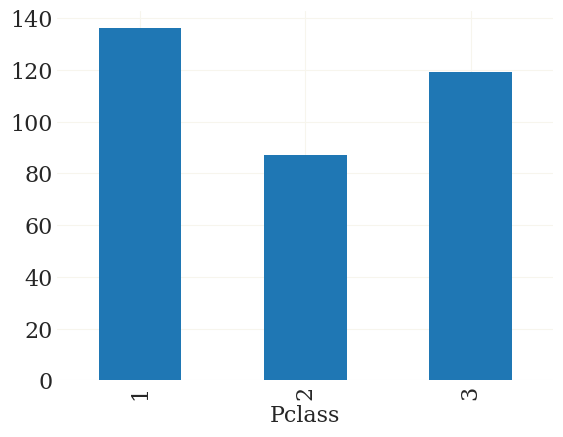

In [39]:
df.groupby('Pclass')['Survived'].sum().plot(kind='bar')

All the needed functionality for the above examples will be explained throughout this tutorial.

# 2. Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


** When do you need pandas? **

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [42]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [46]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

An overview of that information can be given with the `info()` method:

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [50]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [51]:
fict_data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}

In [54]:
df_countries = pd.DataFrame(fict_data)

In [55]:
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [17]:
#

In [121]:
age = df['Age']

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [18]:
#

You can access the underlying numpy array representation with the `.values` attribute:

In [19]:
#

We can access series values via the index, just like for NumPy arrays:

In [20]:
#

Unlike the NumPy array, though, this index can be something other than integers:

In [151]:
df = pd.read_csv("data/titanic.csv")

In [21]:
#

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [22]:
#

A range of methods:

In [24]:
#

Fancy indexing, like indexing with a list or boolean indexing:

In [25]:
#

But also a lot of pandas specific methods, e.g.

In [26]:
#

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare that was paid? And the median?</li>
</ul>
</div>

In [165]:
#

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

In [27]:
#

# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

Very powerful csv reader: `pd.read_csv()`
Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [ ]:
#

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [27]:
#

You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [28]:
#

<div class="alert alert-success">

<b>EXERCISE</b>: Read the `data/20000101_20161231-NO2.csv` file into a DataFrame `no2`
<br><br>
Some aspects about the file:
 <ul>
  <li>Which separator is used in the file?</li>
  <li>The second row includes unit information and should be skipped (check `skiprows` keyword)</li>
  <li>For missing values, it uses the `'n/d'` notation (check `na_values` keyword)</li>
  <li>We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)</li>
</ul>
</div>

In [29]:
#?

# 4. Exploration

Some useful methods:

`head` and `tail`

In [30]:
#

`info()`

In [31]:
#

Getting some basic summary statistics about the data with `describe`:

In [32]:
#

Quickly visualizing the data

In [33]:
#

The default plot (when not specifying `kind`) is a line plot of all columns:

In [34]:
#

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

In [35]:
#

<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

In [36]:
#?

# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [37]:
#

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [38]:
#

or multiple columns:

In [39]:
#

But, slicing accesses the rows:

In [40]:
#

### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [41]:
#

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [42]:
#

The different indexing methods can also be used to assign data:

In [43]:
#

### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [44]:
#

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [45]:
df = pd.read_csv("data/titanic.csv")

NameError: name 'pd' is not defined

In [46]:
#?

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

In [47]:
#?

# 6. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [49]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})

NameError: name 'pd' is not defined

In [51]:
#

### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [52]:
#

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups.

This, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

Similar to SQL `GROUP BY`

In [53]:
#

And many more methods are available. 

In [54]:
#

### Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [ ]:
df = pd.read_csv("data/titanic.csv")

In [ ]:
df.head()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each sex again, but now using groupby.</li>
</ul>
</div>

In [55]:
#?

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [56]:
#?

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [ ]:
#?

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [57]:
#?

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

In [58]:
#?

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

In [59]:
#?

# 7. Working with time series data

In [ ]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [60]:
#

Indexing a time series works with strings:

In [61]:
#

A nice feature is "partial string" indexing, so you don't need to provide the full datetime string.

E.g. all data of January up to March 2012:

In [62]:
#

Time and date components can be accessed from the index:

In [63]:
#